### Data set information

This data set includes votes for each of the U.S. House of Representatives Congressmen on the 16 key votes identified by the CQA. The CQA lists nine different types of votes: voted for, paired for, and announced for (these three simplified to yea), voted against, paired against, and announced against (these three simplified to nay), voted present, voted present to avoid conflict of interest, and did not vote or otherwise make a position known (these three simplified to an unknown disposition).

##### Source:

Congressional Quarterly Almanac, 98th Congress, 2nd session 1984, Volume XL: Congressional Quarterly Inc. Washington, D.C., 1985.
https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

### Attribute Information:

1. Class Name: 2 (democrat, republican)
2. handicapped-infants: 2 (y,n)
3. water-project-cost-sharing: 2 (y,n)
4. adoption-of-the-budget-resolution: 2 (y,n)
5. physician-fee-freeze: 2 (y,n)
6. el-salvador-aid: 2 (y,n)
7. religious-groups-in-schools: 2 (y,n)
8. anti-satellite-test-ban: 2 (y,n)
9. aid-to-nicaraguan-contras: 2 (y,n)
10. mx-missile: 2 (y,n)
11. immigration: 2 (y,n)
12. synfuels-corporation-cutback: 2 (y,n)
13. education-spending: 2 (y,n)
14. superfund-right-to-sue: 2 (y,n)
15. crime: 2 (y,n)
16. duty-free-exports: 2 (y,n)
17. export-administration-act-south-africa: 2 (y,n)

### Objective

Our goal is to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. 

### EDA

First, let's import data and find out what is inside.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)

In [3]:
df.columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious', 
              'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education', 'superfund', 
              'crime', 'duty_free_exports', 'eaa_rsa']

In [4]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [5]:
df.shape

(435, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            435 non-null    object
 2   water              435 non-null    object
 3   budget             435 non-null    object
 4   physician          435 non-null    object
 5   salvador           435 non-null    object
 6   religious          435 non-null    object
 7   satellite          435 non-null    object
 8   aid                435 non-null    object
 9   missile            435 non-null    object
 10  immigration        435 non-null    object
 11  synfuels           435 non-null    object
 12  education          435 non-null    object
 13  superfund          435 non-null    object
 14  crime              435 non-null    object
 15  duty_free_exports  435 non-null    object
 16  eaa_rsa            435 non-null    object
dt

We see that we have got object types for all columns, no null-values, but '?' instead. We need to handle them and encode 'y' and 'n' into '1' and '0'.

First, let's check if there are only 2 unique values in this column.


In [7]:
df.party.value_counts()

democrat      267
republican    168
Name: party, dtype: int64

Now we can encode the data.

In [8]:
def data_encode(n):
    if n == 'y':
        return 1
    elif n == 'n':
        return 0
    else:
        return np.NaN
df.loc[:, 'infants':'eaa_rsa'] = df.loc[:, 'infants':'eaa_rsa'].applymap(data_encode)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            423 non-null    object
 2   water              387 non-null    object
 3   budget             424 non-null    object
 4   physician          424 non-null    object
 5   salvador           420 non-null    object
 6   religious          424 non-null    object
 7   satellite          421 non-null    object
 8   aid                420 non-null    object
 9   missile            413 non-null    object
 10  immigration        428 non-null    object
 11  synfuels           414 non-null    object
 12  education          404 non-null    object
 13  superfund          410 non-null    object
 14  crime              418 non-null    object
 15  duty_free_exports  407 non-null    object
 16  eaa_rsa            331 non-null    object
dt

Now we see that '?' are replaced by null values, so we can use some imputation techniques to handle this.

In [10]:
for i in df.columns:
    print(round(df[i].isnull().sum() / 435, 2))

0.0
0.03
0.11
0.03
0.03
0.03
0.03
0.03
0.03
0.05
0.02
0.05
0.07
0.06
0.04
0.06
0.24


We see that except for a couple of columns there are not many nulls, so for a baseline let's impute zeroes first. We can use xgboost to predict these values while preprocessing later and see if this improves perfomance.

In [11]:
df.fillna(value=0, inplace=True)

### Training and evaluating the model

Now let's get to training. We'll try KNN and logistic regression.

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('party', axis=1)
y = df['party']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  stratify=y)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.8735632183908046


In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

0.9195402298850575


Okay, we see that both models give decent results at first glance, let's check their perfomance in the long run.

In [21]:
predictions_knn = []
for i in range(100):
    knn.fit(X_train, y_train)
    predictions_knn.append(round(knn.score(X_test, y_test), 2))
predictions_knn = np.array(predictions_knn)
print('knn_mean:', np.mean(predictions_knn))
print('knn_std:', np.std(predictions_knn))

knn_mean: 0.87
knn_std: 0.0


In [22]:
predictions_logreg = []
for i in range(100):
    logreg.fit(X_train, y_train)
    predictions_logreg.append(round(logreg.score(X_test, y_test), 2))
predictions_logreg = np.array(predictions_logreg)
print('logreg_mean:', np.mean(predictions_logreg))
print('logreg_std:', np.std(predictions_logreg))

logreg_mean: 0.9200000000000002
logreg_std: 1.1102230246251565e-16


Well, both seem to be quite robust, but let's find out if we can get something more of them.

Text(0, 0.5, 'Accuracy')

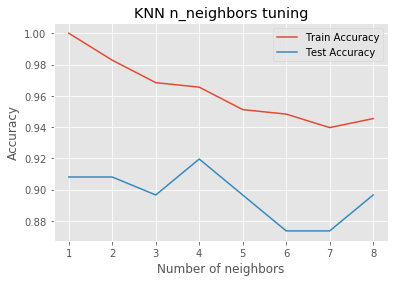

In [23]:
neighbors = np.arange(1, 9)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_acc[i] = knn.score(X_train, y_train)
    test_acc[i] = knn.score(X_test, y_test)
    
plt.title('KNN n_neighbors tuning')
plt.plot(neighbors, train_acc, label='Train Accuracy')
plt.plot(neighbors, test_acc, label='Test Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
    

It looks like we used the worst hyper-parameter as default for KNN, while the best is 4. Let's try it fine-tuned.

In [24]:
knn_tuned = KNeighborsClassifier(n_neighbors=4)

knn_tuned.fit(X_train, y_train)
print(knn_tuned.score(X_test, y_test))

0.9195402298850575


In [25]:
predictions_knn_tuned = []
for i in range(100):
    knn_tuned.fit(X_train, y_train)
    predictions_knn_tuned.append(round(knn_tuned.score(X_test, y_test), 2))
predictions_knn_tuned = np.array(predictions_knn_tuned)
print('knn_mean:', np.mean(predictions_knn_tuned))
print('knn_std:', np.std(predictions_knn_tuned))

knn_mean: 0.9200000000000002
knn_std: 1.1102230246251565e-16


That looks much better, just as the graph says. Although KNN is fast, it's not the best. Log-reg gave the same as first shot.